In [59]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential  # importing sequential model for training
from keras.layers.core import Dense,Dropout,Activation, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractions
from keras.layers.convolutional import Convolution2D, MaxPooling2D # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractions
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [10]:
df = pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# dropping customers_id columns
# df.drop(['customerID'], inplace=True, axis = 'columns')

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.shape

(7043, 21)

In [11]:
df.TotalCharges.values
# here it contain string values and float items  

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df.TotalCharges)

# ValueError: Unable to parse string " " with space


ValueError: Unable to parse string " " at position 488

In [12]:
# lets make error clears
pd.to_numeric(df.TotalCharges, errors = 'coerce') # it will ignore all errors 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [13]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull() # it will show whether any values is null or not 

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
# lets check how many rows are empty
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

# here we got 11 null rows so we can drop them

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df.iloc[488]['TotalCharges']
# it has blank value

' '

In [16]:
# First drop all elements with blank space
df1 = df[df.TotalCharges != ' '] 
# Then store it to new data frame
# now check its shape
df1.shape
# 11 rows dropped

(7032, 21)

In [17]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [18]:
df1[df1.Churn == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [19]:
df1[df1.Churn == 'No'].tenure # check how much tiem customer has been attached


0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [20]:
# store them in new values with yes or No values
tenure_churn_no = df1[df1.Churn == 'No'].tenure 
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure 



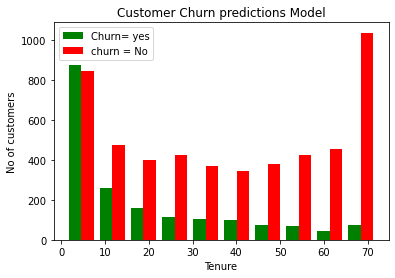

In [21]:
plt.title('Customer Churn predictions Model')
plt.xlabel('Tenure')
plt.ylabel('No of customers')

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label= ['Churn= yes', 'churn = No'])
plt.legend()

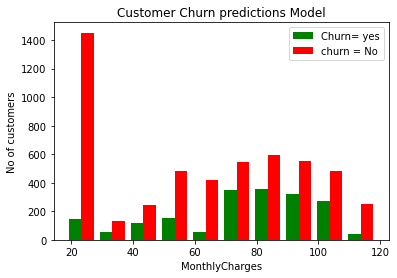

In [22]:
# store them in new values with yes or No values
mon_charges_churn_no = df1[df1.Churn == 'No'].MonthlyCharges 
mon_charges_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges 

plt.title('Customer Churn predictions Model')
plt.xlabel('MonthlyCharges')
plt.ylabel('No of customers')

plt.hist([mon_charges_churn_yes, mon_charges_churn_no], color = ['green', 'red'], label= ['Churn= yes', 'churn = No'])
plt.legend()

In [23]:
# Lets make a function for the unique values of columns
def uniques_columns(df):
    for c in df:
        if df[c].dtypes == 'object':
            print(f'{c}: {df[c].unique()}')

In [24]:
uniques_columns(df1)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [25]:
# Replacing No internet or phone service with NO
df1.replace("No internet service", 'No' , inplace = True)
df1.replace("No phone service", 'No' , inplace = True)

C:\Users\Asim Ramzan\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [26]:
uniques_columns(df1)
# Replaced with No internet or phone service with NO


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [28]:
yes_no_columns = ['Partner','Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport' , 'StreamingTV','StreamingMovies','PaperlessBilling',  'Churn' ]

In [29]:
for yn in yes_no_columns:
    df1[yn].replace({'Yes': 1, 'No': 0}, inplace = True)

C:\Users\Asim Ramzan\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [30]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]


In [31]:
# replacing for gender columns

#     WE CAN DO ALL THIS BY DUMMIES FUNCTION CALL
df1['gender'].replace({'Female': 1, 'Male':0}, inplace = True)
# df1['InternetService'].replace({'DSL': 0, 'Fiber optic':1, 'No': 2}, inplace = True)
# df1['Contract'].replace({'Month-to-month': 0, 'One year':1, 'Two year': 2}, inplace = True)
# df1['PaymentMethod '].replace({'Electronic check': 0, 'Mailed check':1, 'Bank transfer (automatic)': 2}, inplace = True)




In [ ]:
# for col in df1:
#     print(f'{col} : {df1[col].unique()}')

In [32]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService', 'Contract', 'PaymentMethod',])
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df2.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2882,6652-YFFJO,1,0,0,0,11,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3132,2468-SJFLM,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
925,5393-HJZSM,1,0,1,1,32,1,0,1,1,...,1,0,0,1,0,0,1,0,0,0
2510,3707-GNWHM,0,0,0,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
6931,2371-KFUOG,0,0,0,0,58,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0


In [48]:
# In neural Network Scaling of data is neccessary

# columns for scaling
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# lets scale it with MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [49]:
df2.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
221,4443-EMBNA,1,0,1,0,0.985915,1,1,0,0,...,0,0,1,0,0,1,1,0,0,0
668,3859-CVCET,1,0,0,0,0.042254,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2937,5312-IRCFR,1,0,1,1,0.887324,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0
192,2984-RGEYA,1,0,1,1,0.957746,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2800,0519-DRGTI,1,0,1,1,0.267606,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [36]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 

Lets start with splitting and Model Training

In [142]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']
# x = np.asarray(x).astype(np.float32)  
# y = np.asarray(y).astype(np.float32) 

ValueError: could not convert string to float: '7590-VHVEG'

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2 , random_state = 4)

In [141]:
x_train = np.asarray(x_train).astype(np.float32)

y_train = np.asarray(y_train).astype(np.float32)

ValueError: could not convert string to float: '4234-XTNEA'

In [124]:
x_train.shape

(5625, 27)

In [125]:
x_test.shape

(1407, 27)

In [126]:
x_train[:5]
len(x_train.columns)

27

Implementing TensorFlow

In [133]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (27,) ,activation = 'relu' ) ,
#     keras.layers.Dense(15, activation = 'relu' ) ,
    keras.layers.Dense(1, activation = 'sigmoid' ) 
    
])

model.compile(optimizer = 'adam',  loss = 'binary_crossentropy', metrics = ['accuracy']) 
# sparse_categorical_crossentropy means our data is in digits not in hot encoding labels

model.fit(x_train, y_train, epochs = 50)

# evaluating accuracy on test data set

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [47]:
model.evaluate(x_test, y_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
y_test[:10]

In [ ]:
y_p = model.predict(x_test)
y_p[:5]

# convert it 1 if > 0.5
y_pred = []
for element in y_p:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

In [ ]:
y_pred[:5]

showing the HeatMap of this model

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')


In [ ]:
y_test.shape

Accuracy Measurement

In [ ]:
round(915/ (915 + 188), 2) # for label 1

In [ ]:
round(187 /(187 + 117), 2)

### Handling Imbalance Data in Customer Churn

Buidling ANN Model

In [137]:
from tensorflow_addons import losses


In [138]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report



def ANN(x_train, y_train, x_test, y_test, loss, weights):
    
    model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (27,) ,activation = 'relu' ) ,
    keras.layers.Dense(15, activation = 'relu' ) ,
    keras.layers.Dense(1, activation = 'sigmoid' ) 
    
    ])

    model.compile(optimizer = 'adam',  loss = loss, metrics = ['accuracy']) 
        
    if weights == -1:
        model.fit(x_train, y_train, epochs = 100)
    else:
        model.fit(x_train, y_train, epochs = 100, class_weight = weights)
    
    print(model.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print('classification_report: \n', classification_report(y_test, y_preds))


    return y_preds

In [139]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

Under Sampling

In [70]:
# Creating count class

count_class_0, count_class_1 = df1.Churn.value_counts()


# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [72]:
df_class_0.shape

(5163, 28)

In [74]:
df_class_1.shape

(1869, 28)

In [75]:
df_class_0.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5041,4092-OFQZS,0,0,1,0,0.267606,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5144,1078-TDCRN,1,1,1,0,0.028169,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
6457,2233-TXSIU,0,0,1,1,0.225352,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [77]:
df_class_0_under = df_class_0.sample(count_class_1)

In [89]:
# Now concat both df's
df_test = pd.concat([df_class_0_under, df_class_1], axis = 0)
df_test.shape

(3738, 28)

In [90]:
print("random Under sampling: ")
print(df_test.Churn.value_counts())

random Under sampling: 
1    1869
0    1869
Name: Churn, dtype: int64


In [92]:
# Creating x and y columns for model
x = df_test.drop('Churn', axis = "columns")
y = df_test.Churn

In [94]:
# splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2 , random_state = 14, stratify = y)

In [96]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [98]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Over sampling

In [101]:
count_class_0, count_class_1

(5163, 1869)

In [105]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
df_test_over.shape

(10326, 28)

In [106]:
print("random Under sampling: ")
print(df_test_over.Churn.value_counts())

random Under sampling: 
1    5163
0    5163
Name: Churn, dtype: int64


In [107]:
# Creating x and y columns for model
x = df_test_over.drop('Churn', axis = "columns")
y = df_test_over.Churn

In [109]:
#  splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2 , random_state = 14, stratify = y)

In [110]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [114]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)
# Generate an error

SMOTE

In [136]:
x = df_test_over.drop('Churn', axis = "columns")
y = df_test_over.Churn

In [143]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'monitory')

ModuleNotFoundError: No module named 'imblearn'